# Visualize colony images from a single .avi video file frame-by-frame

In [1]:
#Dependencies
%matplotlib notebook

import pandas as pd
import numpy as np
import cv2             # OpenCV library

import colony_iomethods as cm    # methods to extract information from the xml files
import xml.etree.ElementTree as ET # for XML properties

from matplotlib import pyplot as plt

## IndexTracker class for skipping through different plots

In [2]:
import tracker as tr

## Locate the folders and import movies frame-by-frame

In [3]:
fname = "3dTimeScan_17h_init_long"
tstr = "t47"

folder = "C:/Users/Tolga/Dropbox/Raw Data/Colony Images - Confocal/02112020/" + fname + "/"
vidfolder = "Videos/"
vidname = fname + "_" + tstr + ".avi"
vidpath = folder + vidfolder + vidname

# Video capture object from cv2
vidcap = cv2.VideoCapture(vidpath)
# Frame properties
frame_count = int(vidcap.get(cv2.CAP_PROP_FRAME_COUNT))
frame_height = int(vidcap.get(cv2.CAP_PROP_FRAME_HEIGHT))
frame_width = int(vidcap.get(cv2.CAP_PROP_FRAME_WIDTH))

# Numpy array to keep image sequence
img_seq = np.zeros((frame_width, frame_height, frame_count)) # careful for dimensions (w x h) OR (h x w)
for frix in range(frame_count):
    success,frame = vidcap.read()
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    if not success:
        print("Cannot read the frame from vidcap)")
    img_seq[:,:,frix] = frame_gray

## Locate the xml properties file, and collect th video properties

In [4]:
xml_name = "Metadata/EQ59_Single_Colony_TilesScan.lif_" + fname + "_Properties.xml"
xml_path = folder + xml_name

tree = ET.parse(xml_path)    # xml tree of the current stage position
root = tree.getroot()           # root of the xml tree

image_xml = root[0]

dim_desc = cm.collectImageDim(image_xml)
xsz = dim_desc["xsz"]
ysz = dim_desc["ysz"]
zsz = dim_desc["zsz"]
xvoxel = dim_desc["xvoxel"]
yvoxel = dim_desc["yvoxel"]
zvoxel = dim_desc["zvoxel"]
xunit = dim_desc["xunit"]
yunit = dim_desc["yunit"]
zunit = dim_desc["zunit"]

## Important!! 
### Each frame is scaled from a tilescan of 1024x1024 images, to a final 512x512 in the video.
* Collect the tilescan positions and obtain the scalex and scaley

* Scale xvoxel and yvoxel accordingly


In [5]:
tilescan_desc = cm.collectTileScan(image_xml)

tile_xcnt = tilescan_desc["tile_xcnt"]
tile_ycnt = tilescan_desc["tile_ycnt"]

scalex = 1.0/tile_xcnt/2
scaley = 1.0/tile_ycnt/2

tilescan is set


## Interactive plot for real-time analysis

<IPython.core.display.Javascript object>


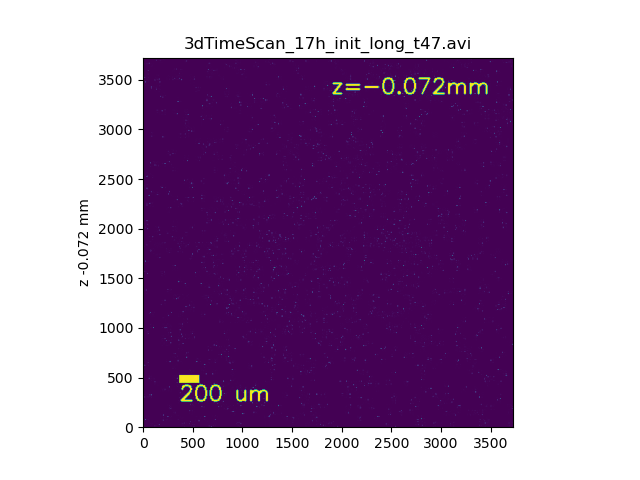

In [6]:
# Define figure and axes
fig, ax = plt.subplots(1,1)

extent = [0, frame_width*xvoxel/scalex, 0, frame_height*yvoxel/scaley] # Extent written for x-y scales
zvals = np.linspace(0,zsz*zvoxel,zsz, endpoint=False)  # array of z values 
# Dictionary to pass into Index Tracker
args_dict = {"extent": extent, "zvals": zvals, "zunit": zunit,
            "title": vidname}

# Plot the image sequence in a figure
tracker = tr.IndexTracker(ax, img_seq, args_dict)
fig.canvas.mpl_connect('scroll_event', tracker.onscroll)
plt.show()

In [7]:
ax

<AxesSubplot:title={'center':'3dTimeScan_17h_init_long_t47.avi'}, ylabel='z -0.468 mm'>

In [8]:
zvals

array([ 0.   , -0.004, -0.008, -0.012, -0.016, -0.02 , -0.024, -0.028,
       -0.032, -0.036, -0.04 , -0.044, -0.048, -0.052, -0.056, -0.06 ,
       -0.064, -0.068, -0.072, -0.076, -0.08 , -0.084, -0.088, -0.092,
       -0.096, -0.1  , -0.104, -0.108, -0.112, -0.116, -0.12 , -0.124,
       -0.128, -0.132, -0.136, -0.14 , -0.144, -0.148, -0.152, -0.156,
       -0.16 , -0.164, -0.168, -0.172, -0.176, -0.18 , -0.184, -0.188,
       -0.192, -0.196, -0.2  , -0.204, -0.208, -0.212, -0.216, -0.22 ,
       -0.224, -0.228, -0.232, -0.236, -0.24 , -0.244, -0.248, -0.252,
       -0.256, -0.26 , -0.264, -0.268, -0.272, -0.276, -0.28 , -0.284,
       -0.288, -0.292, -0.296, -0.3  , -0.304, -0.308, -0.312, -0.316,
       -0.32 , -0.324, -0.328, -0.332, -0.336, -0.34 , -0.344, -0.348,
       -0.352, -0.356, -0.36 , -0.364, -0.368, -0.372, -0.376, -0.38 ,
       -0.384, -0.388, -0.392, -0.396, -0.4  , -0.404, -0.408, -0.412,
       -0.416, -0.42 , -0.424, -0.428, -0.432, -0.436, -0.44 , -0.444,
      